# Data Exploration

This notebook will show you how to download and examine data for simple image classification

We'll go over:

* Downloading the data
* Examining the structure
* Exploring the data

In [18]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Downloading the data

In [19]:
# install curl on Ubuntu using the following command in the terminal: sudo apt install curl   
!curl -o imagenette-160.tgz https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94.1M  100 94.1M    0     0  8780k      0  0:00:10  0:00:10 --:--:-- 9106k


In [20]:
%%capture
!tar xvzf ./imagenette-160.tgz

## Examining the structure 

In [21]:
train_path = Path('./imagenette-160/train')

for d in train_path.iterdir():
    print(d.stem)

n03445777
n02102040
n03394916
n03028079
n03000684
n03425413
n03888257
n01440764
n02979186
n03417042


In [22]:
# change class names
class_names = ['tench', 'english_springer', 'cassette_player', 'chain_saw', 'church', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute']
class_names

['tench',
 'english_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'french_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

In [23]:
for i, d in enumerate(sorted(train_path.iterdir())):
    d.rename('imagenette-160/train/'+class_names[i])

In [24]:
val_path = Path('./imagenette-160/val')

for i, d in enumerate(sorted(val_path.iterdir())):
    d.rename('imagenette-160/val/'+class_names[i])

## Exploring the data

In [25]:
# list of images
images = []

# loop throuh class names and get the first image for that class
for class_name in class_names:

    new_path=Path('imagenette-160/train/'+class_name)
    img = plt.imread(list(new_path.iterdir())[0])
    images.append(img)

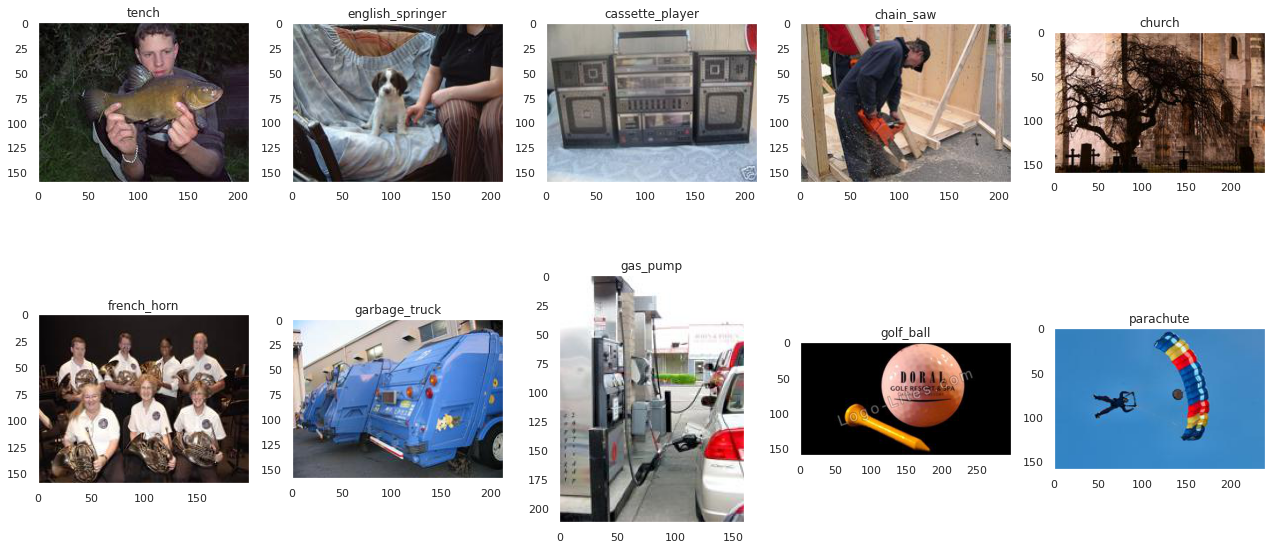

In [35]:
# create subplot and set figure size


fig, axarr = plt.subplots(2, 5, figsize=(22, 10))

# set index to loop through class names and images
x = 0

# loop through data to give 2 rows and 5 columns i = row j = column
for i in range(2):
    for j in range(5):
        axarr[i,j].grid(False)
        axarr[i,j].set_title(class_names[x])
        axarr[i,j].imshow(images[x])
        x+=1

In [36]:
# this function will count the amount of files in each subclass
def count_data(path):
    counts = []
    for class_name in class_names:
        count = len(list(Path(path+class_name).glob('**/*')))
        counts.append(count)
    return counts

In [37]:
# gets the counts of the objects
train_counts = count_data('imagenette-160/train/')
val_counts = count_data('imagenette-160/val/')

In [38]:
# creates a dataframe for our counts that seaborn can use for a bar chart
train_dataset = pd.DataFrame({'classes':class_names,'count':train_counts})
train_dataset.head(5)

,classes,count
0,tench,1300
1,english_springer,1300
2,cassette_player,1300
3,chain_saw,1194
4,church,1300


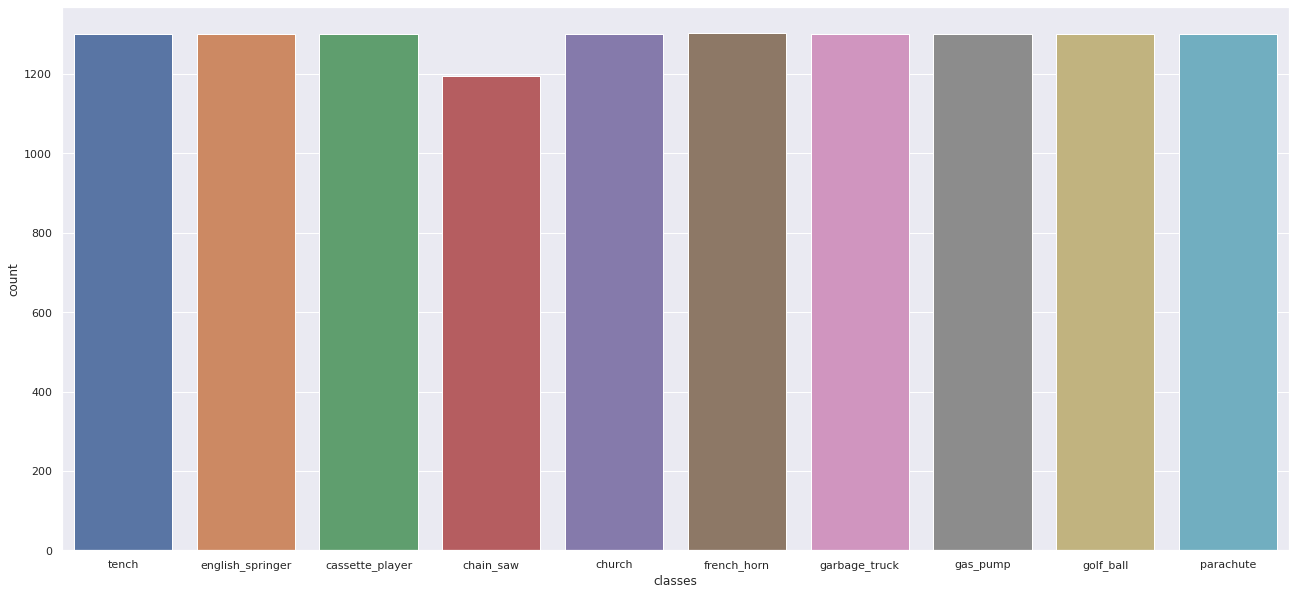

In [39]:
# this bar chart is created using the pandas dataframe
sns.set(rc={'figure.figsize':(22,10)})
sns.barplot(x="classes", y="count", data=train_dataset);

In [40]:
val_dataset = pd.DataFrame({'classes':class_names,'count':val_counts})
val_dataset.head(5)

,classes,count
0,tench,50
1,english_springer,50
2,cassette_player,50
3,chain_saw,50
4,church,50


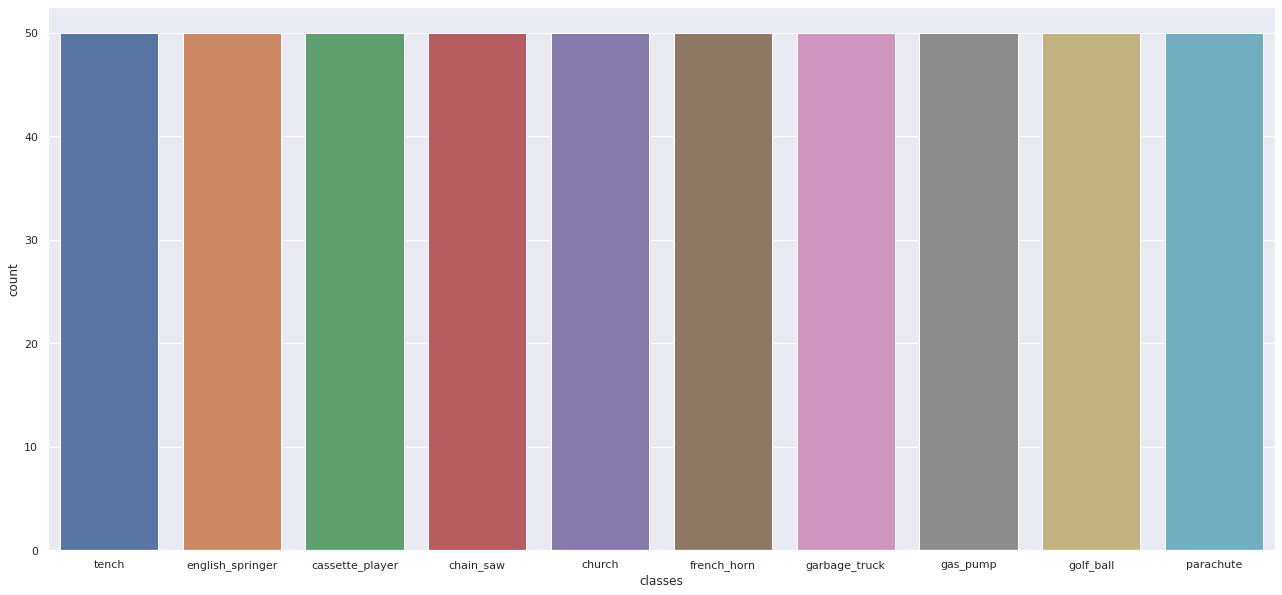

In [41]:
sns.set(rc={'figure.figsize':(22,10)})
sns.barplot(x="classes", y="count", data=val_dataset);